In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)

data = pd.read_csv("fifa21_male2.csv")

In [65]:
col_list = data.columns.tolist()

['Name',
 'Age',
 'OVA',
 'Nationality',
 'Club',
 'BOV',
 'BP',
 'Position',
 'POT',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Value',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 '

In [4]:
for col in data.columns:
    print(col,"| number of unique values: ",data[col].nunique())

ID | number of unique values:  17125
Name | number of unique values:  16176
Age | number of unique values:  30
OVA | number of unique values:  50
Nationality | number of unique values:  167
Club | number of unique values:  917
BOV | number of unique values:  50
BP | number of unique values:  15
Position | number of unique values:  622
Player Photo | number of unique values:  17125
Club Logo | number of unique values:  918
Flag Photo | number of unique values:  167
POT | number of unique values:  47
Team & Contract | number of unique values:  9822
Height | number of unique values:  21
Weight | number of unique values:  57
foot | number of unique values:  2
Growth | number of unique values:  28
Joined | number of unique values:  1953
Loan Date End | number of unique values:  38
Value | number of unique values:  216
Wage | number of unique values:  142
Release Clause | number of unique values:  1200
Contract | number of unique values:  434
Attacking | number of unique values:  366
Crossin

In [5]:
data = data.drop(["ID","Player Photo","Club Logo","Flag Photo","Gender",'Joined','Loan Date End','Wage','Release Clause','Contract','Team & Contract'],axis=1)

In [6]:
#Dealing with euros

# Replace K with 000
data["Value"] = data["Value"].str.replace("K", "000")

# Replace M with 000000
data["Value"] = data["Value"].str.replace("M", "000000")

# Remove .
data["Value"] = data["Value"].str.replace(".", "")

# Remove €
data["Value"] = data["Value"].str.replace("€", "")

# Convert the column to numeric values
data["Value"] = pd.to_numeric(data["Value"])

data

Name  Age  OVA            Nationality           Club  BOV  \
0          G. Pasquale   33   69                  Italy        Udinese   71   
1          Luis García   37   71                  Spain      KAS Eupen   70   
2              J. Cole   33   71                England  Coventry City   71   
3             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
4              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                ...  ...  ...                    ...            ...  ...   
17120       A. Medioub   22   64                 France     CD Tondela   66   
17121       W. Rickard   18   56                  Wales        Burnley   58   
17122       C. Barrett   18   56                England        Burnley   56   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
17124  Pablo Rodríguez   18   59                  Spain          Lecce   61   

        BP      Position  POT Height  Weight   foot  Growth     Value  \
0      LWB            LM   69   6'0"  181lbs   Left       0    625000   
1       CM    CM CAM CDM   71  5'10"  143lbs  Right       0    600000   
2      CAM  CAM RM RW LM   71   5'9"  161lbs  Right       0  11000000   
3       ST           NaN   82  5'11"  165lbs  Right      14         0   
4      CAM        CM CAM   81   5'7"  150lbs  Right       0  55000000   
...    ...           ...  ...    ...     ...    ...     ...       ...   
17120   CB            CB   69   6'6"  165lbs  Right       5    550000   
17121  CAM        CAM CM   66  5'10"  170lbs  Right      10    130000   
17122   RB            RB   67   5'9"  154lbs  Right      11    130000   
17123   RB         RB LB   73   5'9"  148lbs  Right      11    475000   
17124   ST            ST   74  5'10"  154lbs  Right      15    325000   

       Attacking  Crossing  Finishing  Heading Accuracy  Short Passing  \
0            313        75         50                59             71   
1            337        68         64                61             76   
2            337        80         64                41             77   
3            264        54         70                60             80   
4            367        75         69                54             90   
...          ...       ...        ...               ...            ...   
17120        197        35         23                66             47   
17121        248        50         43                50             64   
17122        218        55         34                53             42   
17123        223        62         26                52             60   
17124        254        32         64                59             45   

       Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
0         58.0    338         73   65.0           60            69   
1         68.0    369         69   79.0           79            71   
2         75.0    387         79   84.0           77            69   
3          NaN    255         68    NaN           46            64   
4         79.0    408         85   80.0           70            83   
...        ...    ...        ...    ...          ...           ...   
17120     26.0    193         44   26.0           33            34   
17121     41.0    264         57   42.0           50            61   
17122     34.0    212         52   43.0           34            36   
17123     23.0    258         55   43.0           46            57   
17124     54.0    235         57   45.0           48            30   

       Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
0                71       347            68            74     68.0         69   
1                71       305            56            50     62.0         65   
2                78       295            48            42     71.0         59   
3                77       176            59            62      NaN         55   
4                90       346            61            56

In [7]:
columns_to_apply = ["W/F", 'SM', 'IR']+list(data.loc[:, "LS":"GK"].columns)

# loop through the columns and apply the functions
for col in columns_to_apply:
    # extract the numeric values from the column and assign to a new column
    data[col] = data[col].str.extract('(\d+)', expand=False).astype(int)
    
    # check if the column has a '+' sign and sum the values if true
    if '+' in data[col]:
        data[col] = data[col].str.split('+').apply(lambda x: sum(map(int, x)))

# display the updated DataFrame
data

Name  Age  OVA            Nationality           Club  BOV  \
0          G. Pasquale   33   69                  Italy        Udinese   71   
1          Luis García   37   71                  Spain      KAS Eupen   70   
2              J. Cole   33   71                England  Coventry City   71   
3             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
4              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                ...  ...  ...                    ...            ...  ...   
17120       A. Medioub   22   64                 France     CD Tondela   66   
17121       W. Rickard   18   56                  Wales        Burnley   58   
17122       C. Barrett   18   56                England        Burnley   56   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
17124  Pablo Rodríguez   18   59                  Spain          Lecce   61   

        BP      Position  POT Height  Weight   foot  Growth     Value  \
0      LWB            LM   69   6'0"  181lbs   Left       0    625000   
1       CM    CM CAM CDM   71  5'10"  143lbs  Right       0    600000   
2      CAM  CAM RM RW LM   71   5'9"  161lbs  Right       0  11000000   
3       ST           NaN   82  5'11"  165lbs  Right      14         0   
4      CAM        CM CAM   81   5'7"  150lbs  Right       0  55000000   
...    ...           ...  ...    ...     ...    ...     ...       ...   
17120   CB            CB   69   6'6"  165lbs  Right       5    550000   
17121  CAM        CAM CM   66  5'10"  170lbs  Right      10    130000   
17122   RB            RB   67   5'9"  154lbs  Right      11    130000   
17123   RB         RB LB   73   5'9"  148lbs  Right      11    475000   
17124   ST            ST   74  5'10"  154lbs  Right      15    325000   

       Attacking  Crossing  Finishing  Heading Accuracy  Short Passing  \
0            313        75         50                59             71   
1            337        68         64                61             76   
2            337        80         64                41             77   
3            264        54         70                60             80   
4            367        75         69                54             90   
...          ...       ...        ...               ...            ...   
17120        197        35         23                66             47   
17121        248        50         43                50             64   
17122        218        55         34                53             42   
17123        223        62         26                52             60   
17124        254        32         64                59             45   

       Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
0         58.0    338         73   65.0           60            69   
1         68.0    369         69   79.0           79            71   
2         75.0    387         79   84.0           77            69   
3          NaN    255         68    NaN           46            64   
4         79.0    408         85   80.0           70            83   
...        ...    ...        ...    ...          ...           ...   
17120     26.0    193         44   26.0           33            34   
17121     41.0    264         57   42.0           50            61   
17122     34.0    212         52   43.0           34            36   
17123     23.0    258         55   43.0           46            57   
17124     54.0    235         57   45.0           48            30   

       Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
0                71       347            68            74     68.0         69   
1                71       305            56            50     62.0         65   
2                78       295            48            42     71.0         59   
3                77       176            59            62      NaN         55   
4                90       346            61            56

In [8]:
cols_to_convert = []
for col in data.columns:
    if data[col].dtype == 'float64' and data[col].apply(lambda x: x.is_integer()).any():
        cols_to_convert.append(col)
        
for col in cols_to_convert:
    data[col] = data[col].replace([np.nan, np.inf, -np.inf], [0, np.iinfo(np.int32).max, np.iinfo(np.int32).min])
    data[col] = pd.to_numeric(data[col], downcast='integer', errors='coerce')

data

Name  Age  OVA            Nationality           Club  BOV  \
0          G. Pasquale   33   69                  Italy        Udinese   71   
1          Luis García   37   71                  Spain      KAS Eupen   70   
2              J. Cole   33   71                England  Coventry City   71   
3             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
4              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                ...  ...  ...                    ...            ...  ...   
17120       A. Medioub   22   64                 France     CD Tondela   66   
17121       W. Rickard   18   56                  Wales        Burnley   58   
17122       C. Barrett   18   56                England        Burnley   56   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
17124  Pablo Rodríguez   18   59                  Spain          Lecce   61   

        BP      Position  POT Height  Weight   foot  Growth     Value  \
0      LWB            LM   69   6'0"  181lbs   Left       0    625000   
1       CM    CM CAM CDM   71  5'10"  143lbs  Right       0    600000   
2      CAM  CAM RM RW LM   71   5'9"  161lbs  Right       0  11000000   
3       ST           NaN   82  5'11"  165lbs  Right      14         0   
4      CAM        CM CAM   81   5'7"  150lbs  Right       0  55000000   
...    ...           ...  ...    ...     ...    ...     ...       ...   
17120   CB            CB   69   6'6"  165lbs  Right       5    550000   
17121  CAM        CAM CM   66  5'10"  170lbs  Right      10    130000   
17122   RB            RB   67   5'9"  154lbs  Right      11    130000   
17123   RB         RB LB   73   5'9"  148lbs  Right      11    475000   
17124   ST            ST   74  5'10"  154lbs  Right      15    325000   

       Attacking  Crossing  Finishing  Heading Accuracy  Short Passing  \
0            313        75         50                59             71   
1            337        68         64                61             76   
2            337        80         64                41             77   
3            264        54         70                60             80   
4            367        75         69                54             90   
...          ...       ...        ...               ...            ...   
17120        197        35         23                66             47   
17121        248        50         43                50             64   
17122        218        55         34                53             42   
17123        223        62         26                52             60   
17124        254        32         64                59             45   

       Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
0           58    338         73     65           60            69   
1           68    369         69     79           79            71   
2           75    387         79     84           77            69   
3            0    255         68      0           46            64   
4           79    408         85     80           70            83   
...        ...    ...        ...    ...          ...           ...   
17120       26    193         44     26           33            34   
17121       41    264         57     42           50            61   
17122       34    212         52     43           34            36   
17123       23    258         55     43           46            57   
17124       54    235         57     45           48            30   

       Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
0                71       347            68            74       68         69   
1                71       305            56            50       62         65   
2                78       295            48            42       71         59   
3                77       176            59            62        0         55   
4                90       346            61            56

In [9]:
#convert height and weight
def convert_height(height):
    # extract the feet value from the string
    feet = int(height.split("'")[0])
    # extract the inches value from the string
    inches = int(height.split("'")[1].replace('"', ''))
    # convert feet and inches to total inches
    total_inches = feet * 12 + inches
    return total_inches

def convert_weight(weight):
    # extract the pounds value from the string
    pounds = int(weight.split('lbs')[0])
    return pounds

# apply the conversion functions to the columns "Height" and "Weight"
data['Height'] = data['Height'].apply(convert_height)
data['Weight']= data['Weight'].apply(convert_weight)

data

Name  Age  OVA            Nationality           Club  BOV  \
0          G. Pasquale   33   69                  Italy        Udinese   71   
1          Luis García   37   71                  Spain      KAS Eupen   70   
2              J. Cole   33   71                England  Coventry City   71   
3             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
4              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                ...  ...  ...                    ...            ...  ...   
17120       A. Medioub   22   64                 France     CD Tondela   66   
17121       W. Rickard   18   56                  Wales        Burnley   58   
17122       C. Barrett   18   56                England        Burnley   56   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
17124  Pablo Rodríguez   18   59                  Spain          Lecce   61   

        BP      Position  POT  Height  Weight   foot  Growth     Value  \
0      LWB            LM   69      72     181   Left       0    625000   
1       CM    CM CAM CDM   71      70     143  Right       0    600000   
2      CAM  CAM RM RW LM   71      69     161  Right       0  11000000   
3       ST           NaN   82      71     165  Right      14         0   
4      CAM        CM CAM   81      67     150  Right       0  55000000   
...    ...           ...  ...     ...     ...    ...     ...       ...   
17120   CB            CB   69      78     165  Right       5    550000   
17121  CAM        CAM CM   66      70     170  Right      10    130000   
17122   RB            RB   67      69     154  Right      11    130000   
17123   RB         RB LB   73      69     148  Right      11    475000   
17124   ST            ST   74      70     154  Right      15    325000   

       Attacking  Crossing  Finishing  Heading Accuracy  Short Passing  \
0            313        75         50                59             71   
1            337        68         64                61             76   
2            337        80         64                41             77   
3            264        54         70                60             80   
4            367        75         69                54             90   
...          ...       ...        ...               ...            ...   
17120        197        35         23                66             47   
17121        248        50         43                50             64   
17122        218        55         34                53             42   
17123        223        62         26                52             60   
17124        254        32         64                59             45   

       Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
0           58    338         73     65           60            69   
1           68    369         69     79           79            71   
2           75    387         79     84           77            69   
3            0    255         68      0           46            64   
4           79    408         85     80           70            83   
...        ...    ...        ...    ...          ...           ...   
17120       26    193         44     26           33            34   
17121       41    264         57     42           50            61   
17122       34    212         52     43           34            36   
17123       23    258         55     43           46            57   
17124       54    235         57     45           48            30   

       Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
0                71       347            68            74       68         69   
1                71       305            56            50       62         65   
2                78       295            48            42       71         59   
3                77       176            59            62        0         55   
4                90       346            61  

In [10]:
numeric = data.select_dtypes(include=[np.number])

In [11]:
numeric

Age  OVA  BOV  POT  Height  Weight  Growth     Value  Attacking  \
0       33   69   71   69      72     181       0    625000        313   
1       37   71   70   71      70     143       0    600000        337   
2       33   71   71   71      69     161       0  11000000        337   
3       36   68   70   82      71     165      14         0        264   
4       36   81   82   81      67     150       0  55000000        367   
...    ...  ...  ...  ...     ...     ...     ...       ...        ...   
17120   22   64   66   69      78     165       5    550000        197   
17121   18   56   58   66      70     170      10    130000        248   
17122   18   56   56   67      69     154      11    130000        218   
17123   20   62   62   73      69     148      11    475000        223   
17124   18   59   61   74      70     154      15    325000        254   

       Crossing  Finishing  Heading Accuracy  Short Passing  Volleys  Skill  \
0            75         50                59             71       58    338   
1            68         64                61             76       68    369   
2            80         64                41             77       75    387   
3            54         70                60             80        0    255   
4            75         69                54             90       79    408   
...         ...        ...               ...            ...      ...    ...   
17120        35         23                66             47       26    193   
17121        50         43                50             64       41    264   
17122        55         34                53             42       34    212   
17123        62         26                52             60       23    258   
17124        32         64                59             45       54    235   

       Dribbling  Curve  FK Accuracy  Long Passing  Ball Control  Movement  \
0             73     65           60            69            71       347   
1             69     79           79            71            71       305   
2             79     84           77            69            78       295   
3             68      0           46            64            77       176   
4             85     80           70            83            90       346   
...          ...    ...          ...           ...           ...       ...   
17120         44     26           33            34            56       243   
17121         57     42           50            61            54       298   
17122         52     43           34            36            47       308   
17123         55     43           46            57            57       349   
17124         57     45           48            30            55       317   

       Acceleration  Sprint Speed  Agility  Reactions  Balance  Power  \
0                68            74       68         69       68    347   
1                56            50       62         65       72    324   
2                48            42       71         59       75    284   
3                59            62        0         55        0    239   
4                61            56       79         75       75    297   
...             ...           ...      ...        ...      ...    ...   
17120            52            55       46         48       42    279   
17121            61            63       52         54       68    271   
17122            66            61       54         59       68    233   
17123            72            70       74         56       77    261   
17124            68            72       59         53       65    288   

       Shot Power  Jumping  Stamina  Strength  Long Shots  Mentality  \
0              74       68       69        68          68        320   
1              75       54       64        60          71        362   
2              72       58       29        56          69        317   
3              63        0       51        66          59        27

In [12]:
categoric = data.select_dtypes(include=[np.object])

In [13]:
categoric

Name            Nationality           Club   BP  \
0          G. Pasquale                  Italy        Udinese  LWB   
1          Luis García                  Spain      KAS Eupen   CM   
2              J. Cole                England  Coventry City  CAM   
3             D. Yorke  Trinidad &amp; Tobago     Sunderland   ST   
4              Iniesta                  Spain    Vissel Kobe  CAM   
...                ...                    ...            ...  ...   
17120       A. Medioub                 France     CD Tondela   CB   
17121       W. Rickard                  Wales        Burnley  CAM   
17122       C. Barrett                England        Burnley   RB   
17123   J. Gazibegović     Bosnia Herzegovina  SK Sturm Graz   RB   
17124  Pablo Rodríguez                  Spain          Lecce   ST   

           Position   foot     A/W     D/W Hits  
0                LM   Left  Medium    High    4  
1        CM CAM CDM  Right  Medium  Medium    4  
2      CAM RM RW LM  Right  Medium     Low   11  
3               NaN  Right     NaN     NaN    3  
4            CM CAM  Right    High  Medium  149  
...             ...    ...     ...     ...  ...  
17120            CB  Right  Medium  Medium    5  
17121        CAM CM  Right  Medium  Medium    5  
17122            RB  Right  Medium  Medium    3  
17123         RB LB  Right    High  Medium    5  
17124            ST  Right    High  Medium    4  

[17125 rows x 9 columns]

In [14]:
#clean data nuls 
nulls_df=pd.DataFrame(numeric.isna().sum()/len(data)*100).reset_index() #formatar em tabela
nulls_df.columns=['column_name','percent_nulls']
    
columns_to_drop = nulls_df[nulls_df['percent_nulls']>=50]['column_name'].values
numeric = numeric.drop(columns_to_drop, axis=1)

for col in numeric.columns:
    numeric[col] = numeric[col].fillna(np.mean(numeric[col]))

data

Name  Age  OVA            Nationality           Club  BOV  \
0          G. Pasquale   33   69                  Italy        Udinese   71   
1          Luis García   37   71                  Spain      KAS Eupen   70   
2              J. Cole   33   71                England  Coventry City   71   
3             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
4              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                ...  ...  ...                    ...            ...  ...   
17120       A. Medioub   22   64                 France     CD Tondela   66   
17121       W. Rickard   18   56                  Wales        Burnley   58   
17122       C. Barrett   18   56                England        Burnley   56   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
17124  Pablo Rodríguez   18   59                  Spain          Lecce   61   

        BP      Position  POT  Height  Weight   foot  Growth     Value  \
0      LWB            LM   69      72     181   Left       0    625000   
1       CM    CM CAM CDM   71      70     143  Right       0    600000   
2      CAM  CAM RM RW LM   71      69     161  Right       0  11000000   
3       ST           NaN   82      71     165  Right      14         0   
4      CAM        CM CAM   81      67     150  Right       0  55000000   
...    ...           ...  ...     ...     ...    ...     ...       ...   
17120   CB            CB   69      78     165  Right       5    550000   
17121  CAM        CAM CM   66      70     170  Right      10    130000   
17122   RB            RB   67      69     154  Right      11    130000   
17123   RB         RB LB   73      69     148  Right      11    475000   
17124   ST            ST   74      70     154  Right      15    325000   

       Attacking  Crossing  Finishing  Heading Accuracy  Short Passing  \
0            313        75         50                59             71   
1            337        68         64                61             76   
2            337        80         64                41             77   
3            264        54         70                60             80   
4            367        75         69                54             90   
...          ...       ...        ...               ...            ...   
17120        197        35         23                66             47   
17121        248        50         43                50             64   
17122        218        55         34                53             42   
17123        223        62         26                52             60   
17124        254        32         64                59             45   

       Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
0           58    338         73     65           60            69   
1           68    369         69     79           79            71   
2           75    387         79     84           77            69   
3            0    255         68      0           46            64   
4           79    408         85     80           70            83   
...        ...    ...        ...    ...          ...           ...   
17120       26    193         44     26           33            34   
17121       41    264         57     42           50            61   
17122       34    212         52     43           34            36   
17123       23    258         55     43           46            57   
17124       54    235         57     45           48            30   

       Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
0                71       347            68            74       68         69   
1                71       305            56            50       62         65   
2                78       295            48            42       71         59   
3                77       176            59            62        0         55   
4                90       346            61  

In [15]:
numeric.corr()

Age       OVA       BOV       POT    Height    Weight    Growth  \
Age     1.000000  0.517099  0.456734 -0.237619  0.092935  0.258682 -0.850204   
OVA     0.517099  1.000000  0.985877  0.592268  0.027077  0.151834 -0.595585   
BOV     0.456734  0.985877  1.000000  0.628323  0.015950  0.132560 -0.542890   
POT    -0.237619  0.592268  0.628323  1.000000 -0.021094 -0.039809  0.294499   
Height  0.092935  0.027077  0.015950 -0.021094  1.000000  0.766072 -0.053145   
...          ...       ...       ...       ...       ...       ...       ...   
LCB     0.207569  0.376998  0.400514  0.187047 -0.024907  0.016821 -0.260662   
CB      0.207569  0.376998  0.400514  0.187047 -0.024907  0.016821 -0.260662   
RCB     0.207569  0.376998  0.400514  0.187047 -0.024907  0.016821 -0.260662   
RB      0.150750  0.406816  0.436492  0.242243 -0.234484 -0.181250 -0.240999   
GK      0.158240  0.097549  0.050935  0.026755  0.348496  0.334569 -0.089024   

           Value  Attacking  Crossing  Finishing  Heading Accuracy  \
Age     0.089949   0.183954  0.151022   0.105311          0.172793   
OVA     0.519528   0.431238  0.386334   0.304012          0.305553   
BOV     0.526055   0.464329  0.400046   0.336488          0.335677   
POT     0.454159   0.233866  0.210944   0.173281          0.137199   
Height -0.002578  -0.354000 -0.493419  -0.359231          0.061263   
...          ...        ...       ...        ...               ...   
LCB     0.174643   0.489324  0.488504   0.105631          0.703029   
CB      0.174643   0.489324  0.488504   0.105631          0.703029   
RCB     0.174643   0.489324  0.488504   0.105631          0.703029   
RB      0.209256   0.647000  0.696510   0.289717          0.667142   
GK      0.036161  -0.738093 -0.627985  -0.557637         -0.698657   

        Short Passing   Volleys     Skill  Dribbling     Curve  FK Accuracy  \
Age          0.176786  0.176261  0.168876   0.039607  0.168669     0.223884   
OVA          0.492372  0.352460  0.441689   0.350249  0.387504     0.369278   
BOV          0.533046  0.376928  0.473888   0.388163  0.406499     0.387289   
POT          0.318544  0.167395  0.265503   0.264651  0.209485     0.166233   
Height      -0.352632 -0.330186 -0.455071  -0.484958 -0.435017    -0.399550   
...               ...       ...       ...        ...       ...          ...   
LCB          0.661929  0.191176  0.497537   0.414363  0.342903     0.338474   
CB           0.661929  0.191176  0.497537   0.414363  0.342903     0.338474   
RCB          0.661929  0.191176  0.497537   0.414363  0.342903     0.338474   
RB           0.792456  0.352759  0.682541   0.621561  0.529399     0.498801   
GK          -0.691746 -0.547457 -0.684169  -0.734537 -0.564295    -0.507288   

        Long Passing  Ball Control  Movement  Acceleration  Sprint Speed  \
Age         0.223088      0.121097 -0.055642     -0.186610     -0.180717   
OVA         0.482655      0.431284  0.302267      0.143928      0.153476   
BOV         0.515422      0.471454  0.335011      0.179547      0.189491   
POT         0.283647      0.292414  0.258243      0.197884      0.197396   
Height     -0.315305     -0.411104 -0.632736     -0.550613     -0.454536   
...              ...           ...       ...           ...           ...   
LCB         0.662757      0.545690  0.257200      0.190090      0.223090   
CB          0.662757      0.545690  0.257200      0.190090      0.223090   
RCB         0.662757      0.545690  0.257200      0.190090      0.223090   
RB          0.768279      0.713761  0.505318      0.432830      0.444469   
GK         -0.535783     -0.761021 -0.542920     -0.556203     -0.562337   

         Agility  Reactions   Balance     Power  Shot Power   Jumping  \
Age    -0.055110   0.501010 -0.098089  0.310459    0.304947  0.169153   
OVA     0.210835   0.870084  0.088880  0.546417    0.534829  0.236944   
BOV     0.237297   0.870157  0.113947  0.572275    0.550932  0.239596   
POT     0.170358   0.471139  0.113863  0.221586    0.2669

In [16]:
correlation = numeric.corr()
cols_to_drop = []
drop_next = False
for i in range(len(correlation.columns)):
    if drop_next:
        drop_next = False
        continue
    for j in range(i+1, len(correlation)):
        if correlation.iloc[i,j] == 1.0:
            pass
        elif correlation.iloc[i,j] > 0.9:
            cols_to_drop.append(correlation.columns[i])
            drop_next = True
            break

if not cols_to_drop:
    print('\033[1m' + "There are no high-correlation columns, thus no column was dropped." + '\033[1m')
else:
    numeric = numeric.drop(columns=cols_to_drop)
    print('\033[1m' + "The following high-correlation columns should were dropped: " + '\033[1m', cols_to_drop)
    print("""""")
    print("New numerical data: ")
    display(numeric)

The following high-correlation columns should were dropped:  ['OVA', 'Attacking', 'Finishing', 'Short Passing', 'Skill', 'Ball Control', 'Acceleration', 'Long Shots', 'Interceptions', 'Defending', 'Standing Tackle', 'Goalkeeping', 'GK Handling', 'GK Positioning', 'Total Stats', 'LS', 'RS', 'LF', 'RF', 'LAM', 'RAM', 'LCM', 'RCM', 'LWB', 'CDM', 'RWB', 'LCB', 'RCB']

New numerical data: 


Age  BOV  POT  Height  Weight  Growth     Value  Crossing  \
0       33   71   69      72     181       0    625000        75   
1       37   70   71      70     143       0    600000        68   
2       33   71   71      69     161       0  11000000        80   
3       36   70   82      71     165      14         0        54   
4       36   82   81      67     150       0  55000000        75   
...    ...  ...  ...     ...     ...     ...       ...       ...   
17120   22   66   69      78     165       5    550000        35   
17121   18   58   66      70     170      10    130000        50   
17122   18   56   67      69     154      11    130000        55   
17123   20   62   73      69     148      11    475000        62   
17124   18   61   74      70     154      15    325000        32   

       Heading Accuracy  Volleys  Dribbling  Curve  FK Accuracy  Long Passing  \
0                    59       58         73     65           60            69   
1                    61       68         69     79           79            71   
2                    41       75         79     84           77            69   
3                    60        0         68      0           46            64   
4                    54       79         85     80           70            83   
...                 ...      ...        ...    ...          ...           ...   
17120                66       26         44     26           33            34   
17121                50       41         57     42           50            61   
17122                53       34         52     43           34            36   
17123                52       23         55     43           46            57   
17124                59       54         57     45           48            30   

       Movement  Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  \
0           347            74       68         69       68    347          74   
1           305            50       62         65       72    324          75   
2           295            42       71         59       75    284          72   
3           176            62        0         55        0    239          63   
4           346            56       79         75       75    297          67   
...         ...           ...      ...        ...      ...    ...         ...   
17120       243            55       46         48       42    279          48   
17121       298            63       52         54       68    271          51   
17122       308            61       54         59       68    233          28   
17123       349            70       74         56       77    261          51   
17124       317            72       59         53       65    288          58   

       Jumping  Stamina  Strength  Mentality  Aggression  Positioning  Vision  \
0           68       69        68        320          72           63      66   
1           54       64        60        362          71           72      73   
2           58       29        56        317          69           69      74   
3            0       51        66        271          59           72       0   
4           40       58        62        370          58           78      93   
...        ...      ...       ...        ...         ...          ...     ...   
17120       70       59        74        218          69           23      29   
17121       62       53        57        259          51           55      53   
17122       61       53        54        256          58           49      45   
17123       72       57        48        257          61           46      56   
17124       62       55        52        224          32           64      50   

       Penalties  Composure  Marking  Sliding Tackle  GK Diving  GK Kicking  \
0             50          0       70              69         14          15   
1             75         79       70              40          9          13   
2             66          0       

In [17]:
numeric

Age  BOV  POT  Height  Weight  Growth     Value  Crossing  \
0       33   71   69      72     181       0    625000        75   
1       37   70   71      70     143       0    600000        68   
2       33   71   71      69     161       0  11000000        80   
3       36   70   82      71     165      14         0        54   
4       36   82   81      67     150       0  55000000        75   
...    ...  ...  ...     ...     ...     ...       ...       ...   
17120   22   66   69      78     165       5    550000        35   
17121   18   58   66      70     170      10    130000        50   
17122   18   56   67      69     154      11    130000        55   
17123   20   62   73      69     148      11    475000        62   
17124   18   61   74      70     154      15    325000        32   

       Heading Accuracy  Volleys  Dribbling  Curve  FK Accuracy  Long Passing  \
0                    59       58         73     65           60            69   
1                    61       68         69     79           79            71   
2                    41       75         79     84           77            69   
3                    60        0         68      0           46            64   
4                    54       79         85     80           70            83   
...                 ...      ...        ...    ...          ...           ...   
17120                66       26         44     26           33            34   
17121                50       41         57     42           50            61   
17122                53       34         52     43           34            36   
17123                52       23         55     43           46            57   
17124                59       54         57     45           48            30   

       Movement  Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  \
0           347            74       68         69       68    347          74   
1           305            50       62         65       72    324          75   
2           295            42       71         59       75    284          72   
3           176            62        0         55        0    239          63   
4           346            56       79         75       75    297          67   
...         ...           ...      ...        ...      ...    ...         ...   
17120       243            55       46         48       42    279          48   
17121       298            63       52         54       68    271          51   
17122       308            61       54         59       68    233          28   
17123       349            70       74         56       77    261          51   
17124       317            72       59         53       65    288          58   

       Jumping  Stamina  Strength  Mentality  Aggression  Positioning  Vision  \
0           68       69        68        320          72           63      66   
1           54       64        60        362          71           72      73   
2           58       29        56        317          69           69      74   
3            0       51        66        271          59           72       0   
4           40       58        62        370          58           78      93   
...        ...      ...       ...        ...         ...          ...     ...   
17120       70       59        74        218          69           23      29   
17121       62       53        57        259          51           55      53   
17122       61       53        54        256          58           49      45   
17123       72       57        48        257          61           46      56   
17124       62       55        52        224          32           64      50   

       Penalties  Composure  Marking  Sliding Tackle  GK Diving  GK Kicking  \
0             50          0       70              69         14          15   
1             75         79       70              40          9          13   
2             66          0       

In [18]:
Y  = numeric["POT"].reset_index(drop=True)
numeric_x = numeric.drop(["POT"],axis=1)

In [19]:
for col in numeric_x.columns:
    numeric_x[col] = numeric_x[col].replace(0,numeric_x[col].mean())

In [20]:
arr, lmbda = stats.boxcox(numeric_x[col])
numeric_x[col] = arr

In [21]:
arr

array([0.44387964, 0.44387964, 0.44363261, ..., 0.44346361, 0.44376865,
       0.44346361])

In [22]:
Y

0        69
1        71
2        71
3        82
4        81
         ..
17120    69
17121    66
17122    67
17123    73
17124    74
Name: POT, Length: 17125, dtype: int64

In [23]:
Y.value_counts()

72    1286
73    1266
75    1156
70    1148
71    1145
74    1144
69     963
76     847
68     846
67     780
77     759
78     696
66     631
65     599
79     552
64     516
80     485
81     358
82     292
63     274
83     250
62     192
84     161
85     133
61     125
86      92
60      82
87      69
88      52
59      49
58      36
89      29
57      19
90      19
56      18
55      13
91      12
93       7
92       5
52       5
54       4
48       3
50       3
95       1
53       1
49       1
47       1
Name: POT, dtype: int64

In [24]:
name = categoric["Name"]

In [25]:
categoric = categoric.drop(["Name"],axis=1)

In [26]:
for col in categoric.columns:
    print(col,"| number of unique values: ",categoric[col].nunique())

Nationality | number of unique values:  167
Club | number of unique values:  917
BP | number of unique values:  15
Position | number of unique values:  622
foot | number of unique values:  2
A/W | number of unique values:  3
D/W | number of unique values:  3
Hits | number of unique values:  593


In [27]:
one_hot_names = []
for col in categoric.columns:
    col_uniques = sorted(categoric[col].astype(str).unique())
    for unique in col_uniques:
        one_hot_names.append(col+"_"+unique)

In [28]:
categoric_x = pd.DataFrame(OneHotEncoder().fit_transform(categoric.astype(str)).toarray())
categoric_x.columns = one_hot_names

In [29]:
categoric_x

Nationality_Afghanistan  Nationality_Albania  Nationality_Algeria  \
0                          0.0                  0.0                  0.0   
1                          0.0                  0.0                  0.0   
2                          0.0                  0.0                  0.0   
3                          0.0                  0.0                  0.0   
4                          0.0                  0.0                  0.0   
...                        ...                  ...                  ...   
17120                      0.0                  0.0                  0.0   
17121                      0.0                  0.0                  0.0   
17122                      0.0                  0.0                  0.0   
17123                      0.0                  0.0                  0.0   
17124                      0.0                  0.0                  0.0   

       Nationality_Andorra  Nationality_Angola  \
0                      0.0                 0.0   
1                      0.0                 0.0   
2                      0.0                 0.0   
3                      0.0                 0.0   
4                      0.0                 0.0   
...                    ...                 ...   
17120                  0.0                 0.0   
17121                  0.0                 0.0   
17122                  0.0                 0.0   
17123                  0.0                 0.0   
17124                  0.0                 0.0   

       Nationality_Antigua &amp; Barbuda  Nationality_Argentina  \
0                                    0.0                    0.0   
1                                    0.0                    0.0   
2                                    0.0                    0.0   
3                                    0.0                    0.0   
4                                    0.0                    0.0   
...                                  ...                    ...   
17120                                0.0                    0.0   
17121                                0.0                    0.0   
17122                                0.0                    0.0   
17123                                0.0                    0.0   
17124                                0.0                    0.0   

       Nationality_Armenia  Nationality_Aruba  Nationality_Australia  \
0                      0.0                0.0                    0.0   
1                      0.0                0.0                    0.0   
2                      0.0                0.0                    0.0   
3                      0.0                0.0                    0.0   
4                      0.0                0.0                    0.0   
...                    ...                ...                    ...   
17120                  0.0                0.0                    0.0   
17121                  0.0                0.0                    0.0   
17122                  0.0                0.0                    0.0   
17123                  0.0                0.0                    0.0   
17124                  0.0                0.0                    0.0   

       Nationality_Austria  Nationality_Azerbaijan  Nationality_Barbados  \
0                      0.0                     0.0                   0.0   
1                      0.0                     0.0                   0.0   
2                      0.0                     0.0                   0.0   
3                      0.0                     0.0                   0.0   
4                      0.0                     0.0                   0.0   
...                    ...                     ...                   ...   
17120                  0.0                     0.0                   0.0   
17121                  0.0                     0.0                   0.0   
17122                  0.0                     0.0                   0.0   
17123                  0.0                     0.0             

In [30]:
data_x=pd.DataFrame(np.concatenate((numeric_x,categoric_x),axis=1)).reset_index(drop=True)
data_x.columns = list(numeric_x.columns) + list(categoric_x.columns)
data_x

Age   BOV  Height  Weight     Growth         Value  Crossing  \
0      33.0  71.0    72.0   181.0   5.524788  6.250000e+05      75.0   
1      37.0  70.0    70.0   143.0   5.524788  6.000000e+05      68.0   
2      33.0  71.0    69.0   161.0   5.524788  1.100000e+07      80.0   
3      36.0  70.0    71.0   165.0  14.000000  1.513868e+07      54.0   
4      36.0  82.0    67.0   150.0   5.524788  5.500000e+07      75.0   
...     ...   ...     ...     ...        ...           ...       ...   
17120  22.0  66.0    78.0   165.0   5.000000  5.500000e+05      35.0   
17121  18.0  58.0    70.0   170.0  10.000000  1.300000e+05      50.0   
17122  18.0  56.0    69.0   154.0  11.000000  1.300000e+05      55.0   
17123  20.0  62.0    69.0   148.0  11.000000  4.750000e+05      62.0   
17124  18.0  61.0    70.0   154.0  15.000000  3.250000e+05      32.0   

       Heading Accuracy    Volleys  Dribbling      Curve  FK Accuracy  \
0                  59.0  58.000000       73.0  65.000000         60.0   
1                  61.0  68.000000       69.0  79.000000         79.0   
2                  41.0  75.000000       79.0  84.000000         77.0   
3                  60.0  44.853314       68.0  49.406774         46.0   
4                  54.0  79.000000       85.0  80.000000         70.0   
...                 ...        ...        ...        ...          ...   
17120              66.0  26.000000       44.0  26.000000         33.0   
17121              50.0  41.000000       57.0  42.000000         50.0   
17122              53.0  34.000000       52.0  43.000000         34.0   
17123              52.0  23.000000       55.0  43.000000         46.0   
17124              59.0  54.000000       57.0  45.000000         48.0   

       Long Passing  Movement  Sprint Speed    Agility  Reactions    Balance  \
0              69.0     347.0          74.0  68.000000       69.0  68.000000   
1              71.0     305.0          50.0  62.000000       65.0  72.000000   
2              69.0     295.0          42.0  71.000000       59.0  75.000000   
3              64.0     176.0          62.0  64.383474       55.0  64.496409   
4              83.0     346.0          56.0  79.000000       75.0  75.000000   
...             ...       ...           ...        ...        ...        ...   
17120          34.0     243.0          55.0  46.000000       48.0  42.000000   
17121          61.0     298.0          63.0  52.000000       54.0  68.000000   
17122          36.0     308.0          61.0  54.000000       59.0  68.000000   
17123          57.0     349.0          70.0  74.000000       56.0  77.000000   
17124          30.0     317.0          72.0  59.000000       53.0  65.000000   

       Power  Shot Power    Jumping  Stamina  Strength  Mentality  Aggression  \
0      347.0        74.0  68.000000     69.0      68.0      320.0        72.0   
1      324.0        75.0  54.000000     64.0      60.0      362.0        71.0   
2      284.0        72.0  58.000000     29.0      56.0      317.0        69.0   
3      239.0        63.0  64.949489     51.0      66.0      271.0        59.0   
4      297.0        67.0  40.000000     58.0      62.0      370.0        58.0   
...      ...         ...        ...      ...       ...        ...         ...   
17120  279.0        48.0  70.000000     59.0      74.0      218.0        69.0   
17121  271.0        51.0  62.000000     53.0      57.0      259.0        51.0   
17122  233.0        28.0  61.000000     53.0      54.0      256.0        58.0   
17123  261.0        51.0  72.000000     57.0      48.0      257.0        61.0   
17124  288.0        58.0  62.000000     55.0      52.0      224.0        32.0   

       Positioning     Vision  Penalties  Composure  Marking  Sliding Tackle  \
0             63.0  66.000000       50.0   58.46038     70.0       69.000000   
1             72.0  73.000000       75.0   79.00000     70.0       40.000000   
2             69.0  74.000000       66.0   58.46038     35.0       30.000000   
3           

In [31]:
correlation = data_x.corr()
cols_to_drop = []
drop_next = False
for i in range(len(correlation.columns)):
    if drop_next:
        drop_next = False
        continue
    for j in range(i+1, len(correlation)):
        if correlation.iloc[i,j] == 1.0:
            pass
        elif correlation.iloc[i,j] > 0.9:
            cols_to_drop.append(correlation.columns[i])
            drop_next = True
            break

if not cols_to_drop:
    print('\033[1m' + "There are no high-correlation columns, thus no column was dropped." + '\033[1m')
else:
    data_x = data_x.drop(columns=cols_to_drop)
    print('\033[1m' + "The following high-correlation columns should were dropped: " + '\033[1m', cols_to_drop)
    print("""""")
    print("New numerical data: ")
    display(data_x)

The following high-correlation columns should were dropped:  ['Dribbling', 'Movement', 'Mentality', 'Positioning', 'Marking', 'GK Diving', 'GK Reflexes', 'ST', 'CF', 'CAM', 'CM', 'LDM', 'LB', 'BP_GK']

New numerical data: 


Age   BOV  Height  Weight     Growth         Value  Crossing  \
0      33.0  71.0    72.0   181.0   5.524788  6.250000e+05      75.0   
1      37.0  70.0    70.0   143.0   5.524788  6.000000e+05      68.0   
2      33.0  71.0    69.0   161.0   5.524788  1.100000e+07      80.0   
3      36.0  70.0    71.0   165.0  14.000000  1.513868e+07      54.0   
4      36.0  82.0    67.0   150.0   5.524788  5.500000e+07      75.0   
...     ...   ...     ...     ...        ...           ...       ...   
17120  22.0  66.0    78.0   165.0   5.000000  5.500000e+05      35.0   
17121  18.0  58.0    70.0   170.0  10.000000  1.300000e+05      50.0   
17122  18.0  56.0    69.0   154.0  11.000000  1.300000e+05      55.0   
17123  20.0  62.0    69.0   148.0  11.000000  4.750000e+05      62.0   
17124  18.0  61.0    70.0   154.0  15.000000  3.250000e+05      32.0   

       Heading Accuracy    Volleys      Curve  FK Accuracy  Long Passing  \
0                  59.0  58.000000  65.000000         60.0          69.0   
1                  61.0  68.000000  79.000000         79.0          71.0   
2                  41.0  75.000000  84.000000         77.0          69.0   
3                  60.0  44.853314  49.406774         46.0          64.0   
4                  54.0  79.000000  80.000000         70.0          83.0   
...                 ...        ...        ...          ...           ...   
17120              66.0  26.000000  26.000000         33.0          34.0   
17121              50.0  41.000000  42.000000         50.0          61.0   
17122              53.0  34.000000  43.000000         34.0          36.0   
17123              52.0  23.000000  43.000000         46.0          57.0   
17124              59.0  54.000000  45.000000         48.0          30.0   

       Sprint Speed    Agility  Reactions    Balance  Power  Shot Power  \
0              74.0  68.000000       69.0  68.000000  347.0        74.0   
1              50.0  62.000000       65.0  72.000000  324.0        75.0   
2              42.0  71.000000       59.0  75.000000  284.0        72.0   
3              62.0  64.383474       55.0  64.496409  239.0        63.0   
4              56.0  79.000000       75.0  75.000000  297.0        67.0   
...             ...        ...        ...        ...    ...         ...   
17120          55.0  46.000000       48.0  42.000000  279.0        48.0   
17121          63.0  52.000000       54.0  68.000000  271.0        51.0   
17122          61.0  54.000000       59.0  68.000000  233.0        28.0   
17123          70.0  74.000000       56.0  77.000000  261.0        51.0   
17124          72.0  59.000000       53.0  65.000000  288.0        58.0   

         Jumping  Stamina  Strength  Aggression     Vision  Penalties  \
0      68.000000     69.0      68.0        72.0  66.000000       50.0   
1      54.000000     64.0      60.0        71.0  73.000000       75.0   
2      58.000000     29.0      56.0        69.0  74.000000       66.0   
3      64.949489     51.0      66.0        59.0  55.255825       70.0   
4      40.000000     58.0      62.0        58.0  93.000000       71.0   
...          ...      ...       ...         ...        ...        ...   
17120  70.000000     59.0      74.0        69.0  29.000000       39.0   
17121  62.000000     53.0      57.0        51.0  53.000000       50.0   
17122  61.000000     53.0      54.0        58.0  45.000000       49.0   
17123  72.000000     57.0      48.0        61.0  56.000000       36.0   
17124  62.000000     55.0      52.0        32.0  50.000000       67.0   

       Composure  Sliding Tackle  GK Kicking  Base Stats  W/F   SM   IR   PAC  \
0       58.46038       69.000000        15.0       408.0  3.0  2.0  2.0  71.0   
1       79.00000       40.000000        13.0       385.0  4.0  3.0  1.0  53.0   
2       58.46038       30.000000        13.0       354.0  4.0  4.0  2.0  45.0   
3       58.46038       45.943591        64.0       369.0  3.0  1.0  1.0  61.0   
4       89.00000       56.000000         6.0   

In [32]:
x_train, x_test, y_train, y_test = train_test_split(data_x,Y,test_size=0.4,random_state=100)

In [33]:
model = sm.OLS(y_train,x_train).fit()

In [34]:
predictions = model.predict(x_test)

In [35]:
predictions

13390    74.878692
13655    75.256866
5052     67.215605
10928    69.940385
6154     84.109960
           ...    
8515     68.076390
7825     70.739348
2312     80.790805
4148     73.977041
861      68.660314
Length: 6850, dtype: float64

In [36]:
r2 = r2_score(y_test,predictions)

In [37]:
r2

0.9426426106616255

In [38]:
mse = mean_squared_error(y_test,predictions)

In [39]:
mse

1.882180607243742

In [40]:
rmse = math.sqrt(mse)

In [41]:
rmse

1.3719258752730563

In [42]:
mae = mean_absolute_error(y_test, predictions)

In [43]:
mae

1.0521063519152378

In [44]:
final = pd.concat([name, categoric],axis=1)
final =pd.concat([final, numeric],axis=1)

In [45]:
final["POT_predict"]=model.predict(data_x)

In [46]:
final["POT_predict"].isna().value_counts()

False    17125
Name: POT_predict, dtype: int64

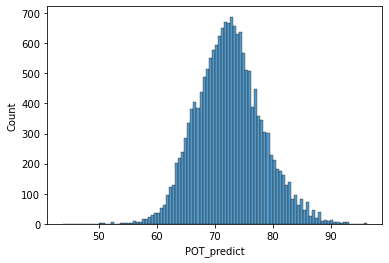

In [47]:
sns.histplot(final["POT_predict"],bins=100)
plt.show()

In [48]:
final = final.reindex(columns=['Name', 'Age', 'BP',"BOV","POT","POT_predict","Value"])

In [49]:
top_3 = final.sort_values(by='POT_predict', ascending=False).head(3)

In [50]:
top_3

Name  Age   BP  BOV  POT  POT_predict       Value
9331   K. Mbappé   21   ST   91   95    96.175454  1055000000
1427  B. Ronhaar   23   CF   88   90    96.106716           0
9633   J. Sancho   20  CAM   89   93    95.541985   695000000

In [51]:
top_3_youngsters = final[final['Age'] < 20].sort_values(by='POT_predict', ascending=False).head(3)

In [52]:
top_3_youngsters

Name  Age  BP  BOV  POT  POT_predict      Value
11207  Vinícius Jr.   19  RM   81   93    92.959795  275000000
11287    E. Haaland   19  ST   85   92    92.000000   45000000
12804       Rodrygo   19  RM   80   90    90.000000   21000000

In [54]:
top_3_bargains = final[final['Value'] <= 1000000].sort_values(by='POT_predict', ascending=False).head(3)

In [55]:
top_3_bargains

Name  Age  BP  BOV  POT  POT_predict  Value
1427      B. Ronhaar   23  CF   88   90    96.106716      0
1425  H. de Noteboom   32  ST   89   90    94.099724      0
1426       J. Maatje   33  ST   85   91    92.243556      0

In [62]:
top_3_bargainsyoung = final[(final['Value'] <= 2000000)&(final['Age'] < 21)
                           ].sort_values(by='POT_predict', ascending=False).head(3)


In [63]:
top_3_bargainsyoung

Name  Age   BP  BOV  POT  POT_predict    Value
14634  J. Gvardiol   18   CB   71   86    86.000000  2000000
12358     C. Jones   19  CAM   69   84    85.700662   950000
14800     Y. Demir   17  CAM   66   85    85.517029   975000